# todo 
- put every constant in a config file 
- create a .py file
- run on CLI
- Statistics on collected data

- Pipeline definition : 
    - collect data
    - score candidates 
- schedule every 2 hours: re-run with Prefect
    https://docs.prefect.io/
- populate in a distant Snowflake ? DB. 



# Interesting projects: 
* Fair Learn : https://fairlearn.org/v0.7.0/about/index.html / joint venture hugging face sklearn  https://www.linkedin.com/in/adrinjalali/?originalSubdomain=de
* Privacy internet: https://hoprnet.org/ / https://twitter.com/hoprnet/status/1564991431659458562
* Privacy Attack Deep learning: https://github.com/search?q=trailofbits%2FPrivacyRaven

* Transparency (nlp): https://github.com/PAIR-code/lit seems powered by Googlge > PAIR ?
* Fairness paper with traction ? https://github.com/xiaomi-automl/FairNAS
* false positive face recognition for gender, race etc : https://github.com/serengil/deepface


In [1]:
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

### key features

repo:
* id: `id`
* full name: `full_name`
* nb stars: `stargazers_count`
* nb watchers: `watchers_count`
* description: `description`
* topics: `topics`
* nb forks: `forks_count`
* language: `language`
* visibility: `visibility`
* nb subscribers: `subscribers_count`
* nb open issues: `open_issues_count`
* creation date : `created_at`
* last modified date: `last_modified`
* has projects : `has_projects`
* has wiki : `has_wiki`
* has downloads : `has_downloads`

owner:
* id: `id`
* name: `name`
* login: `login`
* type: `type` (ex: User)
* bio: `bio`
* company: `company`
* role: `role`
* email: `email`
* followers: `followers`
* following: `following`
* location: `location`
* nb private repos: `total_private_repos`
* nb public_repos: `public_repos`
* team count : `team_count`
* twitter_username: `twitter_username`
* creation date : `created_at`

* organization followers
* last updated
* licensing
* most used topics 

## Scoring

### Filters 
- no code (filter where language is none)
- less than 5 stars 

Scores:
standardize then sum 
- positive: stars, forks, issues, repo_size, max(owner followers, orga followers), max(orga public repos, owner public repos)
- negative: big company

In [67]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [69]:
import matplotlib 
candidates.repo_stargazers_count.quantile(0.5)

63.0

In [46]:
candidates.sort_values(by="score", ascending=False)

,repo_id,repo_full_name,repo_stargazers_count,repo_watchers_count,repo_description,repo_topics,repo_forks_count,repo_language,repo_visibility,repo_subscribers_count,repo_open_issues_count,repo_created_at,repo_last_modified,repo_has_projects,repo_has_wiki,repo_has_downloads,repo_size,repo_raw_data,owner_id,owner_name,owner_login,owner_type,owner_bio,owner_company,owner_role,owner_email,owner_followers,owner_following,owner_location,owner_total_private_repos,owner_public_repos,owner_team_count,owner_twitter_username,owner_created_at,owner_updated_at,owner_raw_data,orga_id,orga_name,orga_login,orga_type,orga_description,orga_company,orga_email,orga_followers,orga_following,orga_location,orga_total_private_repos,orga_public_repos,orga_collaborators,orga_created_at,orga_updated_at,orga_blog,orga_raw_data,taxo_category,query,score,repo_years_since_creation
14,12888993,home-assistant/core,55384,55384,:house_with_garden: Open source home automatio...,"['asyncio', 'hacktoberfest', 'home-automation'...",20091,Python,public,1348,2064,2013-09-17 07:29:48,"Thu, 20 Oct 2022 13:53:05 GMT",True,False,True,387135,"{'id': 12888993, 'node_id': 'MDEwOlJlcG9zaXRvc...",13844975,Home Assistant,home-assistant,Organization,Open source home automation that puts local co...,NaN,NaN,hello@home-assistant.io,1787,0,Your home,NaN,92,NaN,home_assistant,2015-08-18 04:27:28,2022-10-04 11:17:05,"{'login': 'home-assistant', 'id': 13844975, 'n...",13844975.0,Home Assistant,home-assistant,Organization,NaN,NaN,hello@home-assistant.io,1787.0,0.0,Your home,NaN,92.0,NaN,2015-08-18 04:27:28,2022-10-04 11:17:05,https://www.home-assistant.io,"{'login': 'home-assistant', 'id': 13844975, 'n...",privacy,privacy,2.305828,9.115068
1374,162723104,OWASP/CheatSheetSeries,21946,21946,The OWASP Cheat Sheet Series was created to pr...,"['application-security', 'appsec', 'best-pract...",3165,Python,public,524,30,2018-12-21 14:26:43,"Mon, 24 Oct 2022 15:04:30 GMT",True,False,True,1139565,"{'id': 162723104, 'node_id': 'MDEwOlJlcG9zaXRv...",155815,OWASP,OWASP,Organization,The OWASP Foundation,NaN,NaN,admin@owasp.com,1520,0,NaN,NaN,982,NaN,NaN,2009-11-20 06:56:22,2022-10-11 11:05:42,"{'login': 'OWASP', 'id': 155815, 'node_id': 'M...",155815.0,OWASP,OWASP,Organization,NaN,NaN,admin@owasp.com,1520.0,0.0,NaN,NaN,982.0,NaN,2009-11-20 06:56:22,2022-10-11 11:05:42,https://owasp.org,"{'login': 'OWASP', 'id': 155815, 'node_id': 'M...",privacy,information security,1.448282,3.852055
200,35866694,RocketChat/Rocket.Chat,33589,33589,The communications platform that puts data pro...,"['chat', 'collaboration', 'foss', 'free', 'hac...",7670,TypeScript,public,904,3508,2015-05-19 07:36:09,"Thu, 20 Oct 2022 13:56:56 GMT",True,True,True,633207,"{'id': 35866694, 'node_id': 'MDEwOlJlcG9zaXRvc...",12508788,Rocket.Chat,RocketChat,Organization,The communications platform that puts data pro...,NaN,NaN,NaN,366,0,NaN,NaN,237,NaN,NaN,2015-05-19 07:33:29,2022-02-18 13:58:03,"{'login': 'RocketChat', 'id': 12508788, 'node_...",12508788.0,Rocket.Chat,RocketChat,Organization,NaN,NaN,NaN,366.0,0.0,NaN,NaN,237.0,NaN,2015-05-19 07:33:29,2022-02-18 13:58:03,https://rocket.chat,"{'login': 'RocketChat', 'id': 12508788, 'node_...",privacy,data protection,1.429793,7.446575
1386,245961846,PacktPublishing/Python-for-Automating-Informat...,17,17,NaN,[],22,Python,public,4,0,2020-03-09 06:39:43,"Sat, 22 Oct 2022 23:55:09 GMT",False,True,True,10264,"{'id': 245961846, 'node_id': 'MDEwOlJlcG9zaXRv...",10974906,Packt,PacktPublishing,Organization,"Providing books, eBooks, video tutorials, and ...",NaN,NaN,NaN,3370,0,"Birmingham, UK",NaN,7314,NaN,PacktPublishing,2015-02-12 10:36:37,2022-06-20 12:49:49,"{'login': 'PacktPublishing', 'id': 10974906, '...",10974906.0,Packt,PacktPublishing,Organization,NaN,NaN,NaN,3370.0,0.0,"Birmingham, UK",NaN,7314.0,NaN,2015-02-12 10:36:37,2022-06-20 12:49:49,https://www.packt.com,"{'login': 'PacktPublishing', 'id': 10974906, '...",privacy,information security,1.100737,2.635616
808,70291657,llSourcell/gende

In [ ]:
false_positives={
#    "12888993": ,
#    "35866694":,
    "242097396": "learning", # jupyter notebook as main language
    "242097396": "learning", # false positive, reinforcement learning has nothing to do with trustworthy ai
    "188701024": "learning", # sharing of state of the art for XAI -> html as main language
    "193215554": "application", # not relevant ("fair-code" led to the wrong ranking) -> TypeScript as main language
    "41654081": "security_os", # not relevant
  #  "192547145": "ibm", #relevant but big company
    "911765": "social_network" # not relevant, privacy aware social network > ruby as main language
    "492871434": "research" # AI, but not relevant to trustworthy AI,  CV research paper impleme
    "406280658": "research" # library from a Research paper for anomally detection in security attacks
    "366585162": "learning" # XAI course
    
       }

In [49]:

features = ["repo_stargazers_count", 
            "repo_forks_count", 
            "repo_size", 
            "repo_subscribers_count",
            "repo_open_issues_count",
            "repo_years_since_creation",
            "owner_followers", 
            "owner_public_repos",
            "orga_followers",
            "orga_public_repos"
           ]

train = candidates.drop_duplicates(["repo_id"])
train = train[features].fillna(0)
X = StandardScaler().fit_transform(train)
kmeans = KMeans(n_clusters=10).fit(X)
clusters = pd.DataFrame(kmeans.predict(X), index=train.index, columns=["cluster"])
print(clusters.value_counts())
candidates = candidates.merge(clusters, left_index=True, right_index=True)

cluster
0          380
5          108
6            7
9            6
4            5
3            3
8            3
1            1
2            1
7            1
dtype: int64


In [52]:
candidates[candidates.repo_full_name.str.contains("opendp")][["score", "cluster"]]

,score,cluster
141,0.035202,0


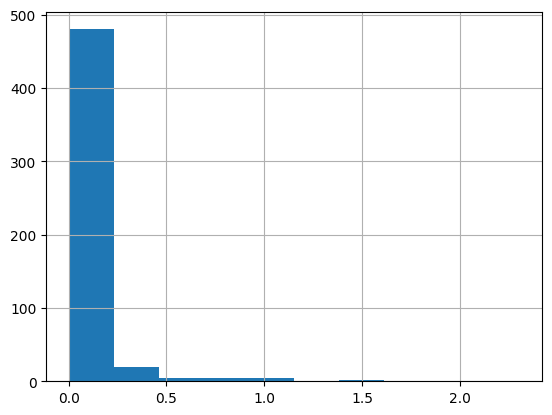

In [53]:
candidates.score.hist();

In [54]:
for i in range(10):
    cluster_size = len(candidates[candidates["cluster"]==i])
    if cluster_size < 10: 
        continue
    print("\n--------\ncluster", str(i) ,": ", cluster_size,"repo(s) \n")
    print(candidates[candidates["cluster"] == i][features].median())


--------
cluster 0 :  380 repo(s) 

repo_stargazers_count          55.0
repo_forks_count               16.0
repo_size                    4568.0
repo_subscribers_count          5.0
repo_open_issues_count          2.0
repo_years_since_creation       3.3
owner_followers                33.0
owner_public_repos             22.5
orga_followers                 17.0
orga_public_repos              25.0
dtype: float64

--------
cluster 5 :  108 repo(s) 

repo_stargazers_count          75.000000
repo_forks_count               20.500000
repo_size                    1570.500000
repo_subscribers_count          9.000000
repo_open_issues_count          3.000000
repo_years_since_creation       7.610959
owner_followers                27.000000
owner_public_repos             24.500000
orga_followers                  7.000000
orga_public_repos              28.000000
dtype: float64


In [55]:
candidates.repo_stargazers_count.quantile(0.7)

151.79999999999995

In [56]:
candidates[candidates.repo_full_name.str.contains("opendp")]

,repo_id,repo_full_name,repo_stargazers_count,repo_watchers_count,repo_description,repo_topics,repo_forks_count,repo_language,repo_visibility,repo_subscribers_count,repo_open_issues_count,repo_created_at,repo_last_modified,repo_has_projects,repo_has_wiki,repo_has_downloads,repo_size,repo_raw_data,owner_id,owner_name,owner_login,owner_type,owner_bio,owner_company,owner_role,owner_email,owner_followers,owner_following,owner_location,owner_total_private_repos,owner_public_repos,owner_team_count,owner_twitter_username,owner_created_at,owner_updated_at,owner_raw_data,orga_id,orga_name,orga_login,orga_type,orga_description,orga_company,orga_email,orga_followers,orga_following,orga_location,orga_total_private_repos,orga_public_repos,orga_collaborators,orga_created_at,orga_updated_at,orga_blog,orga_raw_data,taxo_category,query,score,repo_years_since_creation,cluster
141,210420701,opendp/smartnoise-sdk,166,166,Tools and service for differentially private p...,"['differential-privacy', 'opendp', 'privacy', ...",41,Python,public,24,19,2019-09-23 18:06:00,"Wed, 19 Oct 2022 11:35:49 GMT",True,True,True,40753,"{'id': 210420701, 'node_id': 'MDEwOlJlcG9zaXRv...",74011960,OpenDP,opendp,Organization,Open Differential Privacy,NaN,NaN,info@opendp.org,47,0,NaN,NaN,25,NaN,opendp_org,2020-11-05 16:14:59,2021-07-16 14:14:56,"{'login': 'opendp', 'id': 74011960, 'node_id':...",74011960.0,OpenDP,opendp,Organization,NaN,NaN,info@opendp.org,47.0,0.0,NaN,NaN,25.0,NaN,2020-11-05 16:14:59,2021-07-16 14:14:56,http://opendp.org/,"{'login': 'opendp', 'id': 74011960, 'node_id':...",privacy,data privacy,0.035202,3.093151,0


In [57]:
candidates[(candidates.cluster == 0) & (candidates.repo_stargazers_count > 25) & (candidates.score > candidates.score.quantile(0.7))].head(50)

,repo_id,repo_full_name,repo_stargazers_count,repo_watchers_count,repo_description,repo_topics,repo_forks_count,repo_language,repo_visibility,repo_subscribers_count,repo_open_issues_count,repo_created_at,repo_last_modified,repo_has_projects,repo_has_wiki,repo_has_downloads,repo_size,repo_raw_data,owner_id,owner_name,owner_login,owner_type,owner_bio,owner_company,owner_role,owner_email,owner_followers,owner_following,owner_location,owner_total_private_repos,owner_public_repos,owner_team_count,owner_twitter_username,owner_created_at,owner_updated_at,owner_raw_data,orga_id,orga_name,orga_login,orga_type,orga_description,orga_company,orga_email,orga_followers,orga_following,orga_location,orga_total_private_repos,orga_public_repos,orga_collaborators,orga_created_at,orga_updated_at,orga_blog,orga_raw_data,taxo_category,query,score,repo_years_since_creation,cluster
829,172505630,krishnaik06/Gender-Recognition-and-Age-Estimator,66,66,NaN,[],66,Python,public,2,6,2019-02-25 12:54:02,"Sat, 01 Oct 2022 15:26:15 GMT",True,True,True,105,"{'id': 172505630, 'node_id': 'MDEwOlJlcG9zaXRv...",20041231,Krish C Naik,krishnaik06,User,Data Scientist with ML and Deep Learning expe...,Panasonic IIC,NaN,krishnaik06@gmail.com,16253,0,Bangalore,NaN,244,NaN,NaN,2016-06-20 09:25:45,2022-09-28 09:22:41,"{'login': 'krishnaik06', 'id': 20041231, 'node...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fairness,gender,0.486058,3.671233,0
310,125381318,Trusted-AI/adversarial-robustness-toolbox,3299,3299,Adversarial Robustness Toolbox (ART) - Python ...,"['adversarial-attacks', 'adversarial-examples'...",898,Python,public,92,98,2018-03-15 14:40:43,"Wed, 19 Oct 2022 16:49:02 GMT",True,True,True,388177,"{'id': 125381318, 'node_id': 'MDEwOlJlcG9zaXRv...",56103733,NaN,Trusted-AI,Organization,This GitHub org hosts LF AI Foundation project...,NaN,NaN,info@lfai.foundation,88,0,IBM,NaN,4,NaN,LFAI_Foundation,2019-10-03 04:27:47,2022-10-17 13:52:50,"{'login': 'Trusted-AI', 'id': 56103733, 'node_...",56103733.0,NaN,Trusted-AI,Organization,NaN,NaN,info@lfai.foundation,88.0,0.0,IBM,NaN,4.0,NaN,2019-10-03 04:27:47,2022-10-17 13:52:50,NaN,"{'login': 'Trusted-AI', 'id': 56103733, 'node_...",privacy,privacy attack,0.351739,4.621918,0
1218,204734444,pytorch/captum,3506,3506,Model interpretability and understanding for P...,"['feature-attribution', 'feature-importance', ...",381,Python,public,213,131,2019-08-27 15:34:41,"Thu, 20 Oct 2022 13:17:23 GMT",True,True,True,263551,"{'id': 204734444, 'node_id': 'MDEwOlJlcG9zaXRv...",21003710,NaN,pytorch,Organization,NaN,NaN,NaN,NaN,1728,0,where the eigens are valued,NaN,68,NaN,NaN,2016-08-13 05:07:47,2022-04-01 07:03:54,"{'login': 'pytorch', 'id': 21003710, 'node_id'...",21003710.0,NaN,pytorch,Organization,NaN,NaN,NaN,1728.0,0.0,where the eigens are valued,NaN,68.0,NaN,2016-08-13 05:07:47,2022-04-01 07:03:54,https://pytorch.org,"{'login': 'pytorch', 'id': 21003710, 'node_id'...",transparency,Model interpretability,0.305165,3.167123,0
79,353494486,iron-fish/ironfish,676,676,A novel cryptocurrency focused on privacy and ...,"['blockchain', 'cryptocurrency', 'p2p']",336,TypeScript,public,29,199,2021-03-31 21:26:37,"Wed, 19 Oct 2022 12:24:18 GMT",True,True,True,375113,"{'id': 353494486, 'node_id': 'MDEwOlJlcG9zaXRv...",43299557,Iron Fish,iron-fish,Organization,A novel cryptocurrency focused on privacy and ...,NaN,NaN,contact@ironfish.network,210,0,NaN,NaN,17,NaN,ironfishcrypto,2018-09-15 16:33:07,2022-10-17 17:48:26,"{'login': 'iron-fish', 'id': 43299557, 'node_i...",43299557.0,Iron Fish,iron-fish,Organization,NaN,NaN,contact@ironfish.network,210.0,0.0,NaN,NaN,17.0,NaN,2018-09-15 16:33:07,2022-10-17 17:48:26,https://ironfish.network,"{'login': 'iron-fish', 'id': 43299557, 'node_i...",privacy,privacy,0.273308,1.572603,0
1749,109096100,locuslab/convex_adversarial,337,337,A method for training neural networks that are...,[],80,Python,public,16,8,2017-11-01 06:35:32,"Sat, 15 Oct 2022 14:16:43 GMT",True,True,True,400328,"{'id':

In [58]:
#show descriptions 
for e in candidates[candidates["cluster"] == 0].repo_description.head(100).values:
    print(e,"\n\n------")

nan 

------
Adversarial Robustness Toolbox (ART) - Python Library for Machine Learning Security - Evasion, Poisoning, Extraction, Inference - Red and Blue Teams 

------
Model interpretability and understanding for PyTorch 

------
linuxfoundation http://feeds2.feedburner.com/Command-line-fu http://steve-jansen.github.io/guides/windows-batch-scripting/part-5-if-then-conditionals.html https://www.podfeet.com/blog/2019/07/nc-742/ https://blog.gaijinpot.com/netflix-japan-10-series-to-binge-in-2019/ メッセージ送受信用  格納場所 タスクの名前 https://www.semanticscholar.org/paper/Chapter-2-BASIC-CONCEPTS-OF-REAL-TIME-OPERATING-Rammig-Ditze/5ca369031afd1909b674dfa20c2fc336821ef292 find . -name '*.c' -o -name '*.h' -o -name '*.S' > cscope.files https://blog.gaijinpot.com/gpod-20-best-podcasts-japan/ https://www.tofugu.com/japanese/onyomi-kunyomi/ https://www.behindthename.com/glossary/view/nanori_reading Setsubun (節分) 即位礼正殿の儀 https://vi.wikipedia.org/wiki/Tu%E1%BA%A7n_l%E1%BB%85_V%C3%A0ng_(Nh%E1%BA%ADt_B%E1%BA%

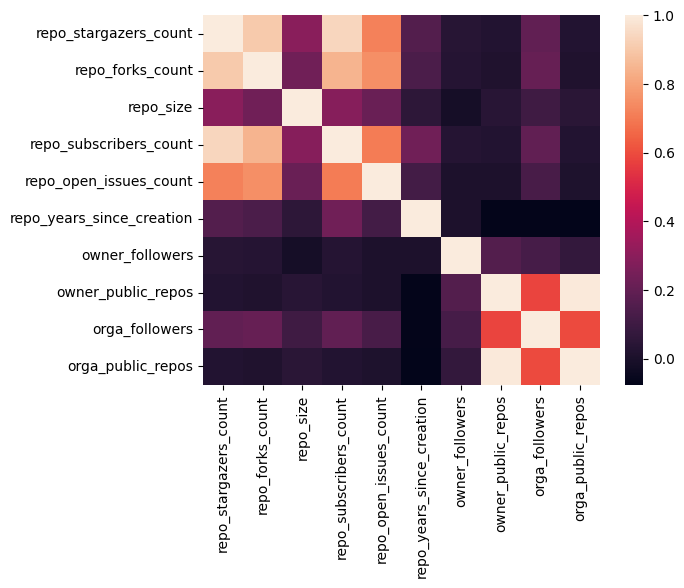

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.DataFrame(X, columns=features).corr());

In [60]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.36542697, 0.24660783])

In [62]:
import numpy as np 
np.max(components[:, 1])

23.87966320078013

In [63]:

pca_res = pd.DataFrame(components, columns=["pc_1", "pc_2"], index=candidates.index)
candidates.merge(pca_res, left_index=True, right_index=True)

,repo_id,repo_full_name,repo_stargazers_count,repo_watchers_count,repo_description,repo_topics,repo_forks_count,repo_language,repo_visibility,repo_subscribers_count,repo_open_issues_count,repo_created_at,repo_last_modified,repo_has_projects,repo_has_wiki,repo_has_downloads,repo_size,repo_raw_data,owner_id,owner_name,owner_login,owner_type,owner_bio,owner_company,owner_role,owner_email,owner_followers,owner_following,owner_location,owner_total_private_repos,owner_public_repos,owner_team_count,owner_twitter_username,owner_created_at,owner_updated_at,owner_raw_data,orga_id,orga_name,orga_login,orga_type,orga_description,orga_company,orga_email,orga_followers,orga_following,orga_location,orga_total_private_repos,orga_public_repos,orga_collaborators,orga_created_at,orga_updated_at,orga_blog,orga_raw_data,taxo_category,query,score,repo_years_since_creation,cluster,pc_1,pc_2
14,12888993,home-assistant/core,55384,55384,:house_with_garden: Open source home automatio...,"['asyncio', 'hacktoberfest', 'home-automation'...",20091,Python,public,1348,2064,2013-09-17 07:29:48,"Thu, 20 Oct 2022 13:53:05 GMT",True,False,True,387135,"{'id': 12888993, 'node_id': 'MDEwOlJlcG9zaXRvc...",13844975,Home Assistant,home-assistant,Organization,Open source home automation that puts local co...,NaN,NaN,hello@home-assistant.io,1787,0,Your home,NaN,92,NaN,home_assistant,2015-08-18 04:27:28,2022-10-04 11:17:05,"{'login': 'home-assistant', 'id': 13844975, 'n...",13844975.0,Home Assistant,home-assistant,Organization,NaN,NaN,hello@home-assistant.io,1787.0,0.0,Your home,NaN,92.0,NaN,2015-08-18 04:27:28,2022-10-04 11:17:05,https://www.home-assistant.io,"{'login': 'home-assistant', 'id': 13844975, 'n...",privacy,privacy,2.305828,9.115068,7,30.504034,-3.666220
1374,162723104,OWASP/CheatSheetSeries,21946,21946,The OWASP Cheat Sheet Series was created to pr...,"['application-security', 'appsec', 'best-pract...",3165,Python,public,524,30,2018-12-21 14:26:43,"Mon, 24 Oct 2022 15:04:30 GMT",True,False,True,1139565,"{'id': 162723104, 'node_id': 'MDEwOlJlcG9zaXRv...",155815,OWASP,OWASP,Organization,The OWASP Foundation,NaN,NaN,admin@owasp.com,1520,0,NaN,NaN,982,NaN,NaN,2009-11-20 06:56:22,2022-10-11 11:05:42,"{'login': 'OWASP', 'id': 155815, 'node_id': 'M...",155815.0,OWASP,OWASP,Organization,NaN,NaN,admin@owasp.com,1520.0,0.0,NaN,NaN,982.0,NaN,2009-11-20 06:56:22,2022-10-11 11:05:42,https://owasp.org,"{'login': 'OWASP', 'id': 155815, 'node_id': 'M...",privacy,information security,1.448282,3.852055,9,9.528154,2.878528
200,35866694,RocketChat/Rocket.Chat,33589,33589,The communications platform that puts data pro...,"['chat', 'collaboration', 'foss', 'free', 'hac...",7670,TypeScript,public,904,3508,2015-05-19 07:36:09,"Thu, 20 Oct 2022 13:56:56 GMT",True,True,True,633207,"{'id': 35866694, 'node_id': 'MDEwOlJlcG9zaXRvc...",12508788,Rocket.Chat,RocketChat,Organization,The communications platform that puts data pro...,NaN,NaN,NaN,366,0,NaN,NaN,237,NaN,NaN,2015-05-19 07:33:29,2022-02-18 13:58:03,"{'login': 'RocketChat', 'id': 12508788, 'node_...",12508788.0,Rocket.Chat,RocketChat,Organization,NaN,NaN,NaN,366.0,0.0,NaN,NaN,237.0,NaN,2015-05-19 07:33:29,2022-02-18 13:58:03,https://rocket.chat,"{'login': 'RocketChat', 'id': 12508788, 'node_...",privacy,data protection,1.429793,7.446575,1,21.998008,-3.512199
1386,245961846,PacktPublishing/Python-for-Automating-Informat...,17,17,NaN,[],22,Python,public,4,0,2020-03-09 06:39:43,"Sat, 22 Oct 2022 23:55:09 GMT",False,True,True,10264,"{'id': 245961846, 'node_id': 'MDEwOlJlcG9zaXRv...",10974906,Packt,PacktPublishing,Organization,"Providing books, eBooks, video tutorials, and ...",NaN,NaN,NaN,3370,0,"Birmingham, UK",NaN,7314,NaN,PacktPublishing,2015-02-12 10:36:37,2022-06-20 12:49:49,"{'login': 'PacktPublishing', 'id': 10974906, '...",10974906.0,Packt,PacktPublishing,Organization,NaN,NaN,NaN,3370.0,0.0,"Birmingham, UK",NaN,7314.0,NaN,2015-02-12 10:36:37,2022-06-20 12:49:49,https://www.packt.com,"{'login': 'PacktPublishing', 'id': 10974906, 

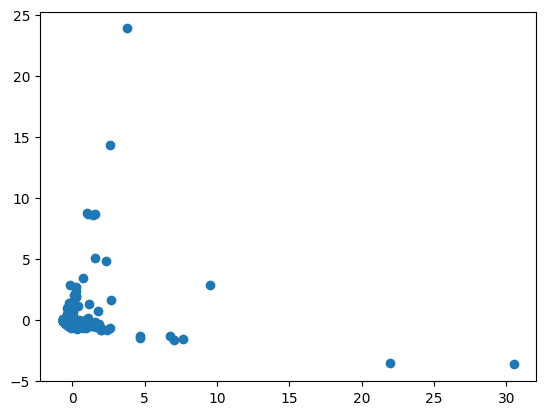

In [64]:
plt.scatter(components[:, 0], components[:, 1])

# HUGGING FACE

In [ ]:
! pip install huggingface_hub


In [2]:
from huggingface_hub import HfApi
api = HfApi()


In [4]:
len(api.list_models())

77781

In [57]:
api.list_models(search="privacy")

[ModelInfo: {
 	modelId: pile-of-law/distilbert-base-uncased-finetuned-eoir_privacy
 	sha: None
 	lastModified: None
 	tags: None
 	pipeline_tag: text-classification
 	siblings: None
 	private: False
 	author: None
 	config: None
 	securityStatus: None
 	id: pile-of-law/distilbert-base-uncased-finetuned-eoir_privacy
 },
 ModelInfo: {
 	modelId: momo/KcELECTRA-base_Hate_speech_Privacy_Detection
 	sha: None
 	lastModified: None
 	tags: None
 	pipeline_tag: text-classification
 	siblings: None
 	private: False
 	author: None
 	config: None
 	securityStatus: None
 	id: momo/KcELECTRA-base_Hate_speech_Privacy_Detection
 },
 ModelInfo: {
 	modelId: momo/KcBERT-base_Hate_speech_Privacy_Detection
 	sha: None
 	lastModified: None
 	tags: None
 	pipeline_tag: text-classification
 	siblings: None
 	private: False
 	author: None
 	config: None
 	securityStatus: None
 	id: momo/KcBERT-base_Hate_speech_Privacy_Detection
 },
 ModelInfo: {
 	modelId: muhtasham/bert-small-finetuned-eoir_privacy
 	sha: 

In [5]:
len(api.list_datasets())

11748

In [58]:
api.list_datasets(search="privacy")

[DatasetInfo: {
 	id: arjunth2001/online_privacy_qna
 	sha: c633b5c257a7adc28f782b1d5c5b60f9f391a31f
 	lastModified: 2021-11-10T08:53:10.000Z
 	tags: []
 	private: False
 	author: arjunth2001
 	description: None
 	citation: None
 	cardData: None
 	siblings: None
 	gated: False
 	downloads: 320
 },
 DatasetInfo: {
 	id: ceyda/test-privacy
 	sha: bafeb849715ae4aef0cd99fb2b82b4a7d8f31f95
 	lastModified: 2022-04-25T08:36:19.000Z
 	tags: ['license:other']
 	private: False
 	author: ceyda
 	description: None
 	citation: None
 	cardData: None
 	siblings: None
 	gated: True
 	downloads: 2
 },
 DatasetInfo: {
 	id: pile-of-law/eoir_privacy
 	sha: 212b8789f3958e28a961b7147be3c52b83992918
 	lastModified: 2022-07-07T08:44:32.000Z
 	tags: ['arxiv:2207.00220', 'language_creators:found', 'language:en', 'license:cc-by-nc-sa-4.0', 'multilinguality:monolingual', 'pretty_name:eoir_privacy', 'task_categories:text-classification']
 	private: False
 	author: pile-of-law
 	description: A living legal dataset

In [7]:
len(api.list_spaces())

13499

In [8]:
len(api.list_metrics())

85

In [50]:
len(api.list_repo_files("distilbert-base-uncased-finetuned-sst-2-english"))

9

In [10]:
from huggingface_hub import ModelSearchArguments, DatasetSearchArguments, 

model_args = ModelSearchArguments()
dataset_args = DatasetSearchArguments()

In [43]:
model_args.pipeline_tag

Available Attributes or Keys:
 * AudioClassification
 * Audio_to_Audio
 * AutomaticSpeechRecognition
 * Conversational
 * DocumentQuestionAnswering
 * FeatureExtraction
 * Fill_Mask
 * ImageClassification
 * ImageSegmentation
 * Image_to_Image
 * Image_to_Text
 * ObjectDetection
 * QuestionAnswering
 * ReinforcementLearning
 * Robotics
 * SentenceSimilarity
 * Summarization
 * TableQuestionAnswering
 * TabularClassification
 * TabularRegression
 * Text2TextGeneration (Key only)
 * TextClassification
 * TextGeneration
 * Text_to_Image
 * Text_to_Speech
 * TokenClassification
 * Translation
 * UnconditionalImageGeneration
 * VisualQuestionAnswering
 * VoiceActivityDetection
 * Zero_ShotClassification
 * Zero_ShotImageClassification

In [47]:
from huggingface_hub import ModelFilter, DatasetFilter

filt = ModelFilter(
    task=model_args.pipeline_tag.TextClassification, 
    trained_dataset=dataset_args.dataset_name.glue, 
#    library=model_args.library.PyTorch
)
api.list_models(filter=filt)[0]

ModelInfo: {
	modelId: distilbert-base-uncased-finetuned-sst-2-english
	sha: 324d3097568e82724d53d7ac1d312aa719d48037
	lastModified: 2022-08-16T13:26:26.000Z
	tags: ['pytorch', 'tf', 'rust', 'distilbert', 'text-classification', 'en', 'dataset:sst2', 'dataset:glue', 'transformers', 'license:apache-2.0', 'model-index']
	pipeline_tag: text-classification
	siblings: [RepoFile(rfilename='.gitattributes', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='README.md', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='config.json', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='map.jpeg', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='pytorch_model.bin', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='rust_model.ot', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='tf_model.h5', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='tokenizer_config.json', size='None', blob_id='None', lfs='None'), RepoFile(r

In [48]:
api.model_info("distilbert-base-uncased-finetuned-sst-2-english")

ModelInfo: {
	modelId: distilbert-base-uncased-finetuned-sst-2-english
	sha: 324d3097568e82724d53d7ac1d312aa719d48037
	lastModified: 2022-08-16T13:26:26.000Z
	tags: ['pytorch', 'tf', 'rust', 'distilbert', 'text-classification', 'en', 'dataset:sst2', 'dataset:glue', 'transformers', 'license:apache-2.0', 'model-index']
	pipeline_tag: text-classification
	siblings: [RepoFile(rfilename='.gitattributes', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='README.md', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='config.json', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='map.jpeg', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='pytorch_model.bin', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='rust_model.ot', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='tf_model.h5', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='tokenizer_config.json', size='None', blob_id='None', lfs='None'), RepoFile(r

In [30]:
api.list_spaces(search="fairness")

[SpaceInfo: {
 	id: merve/measuring-fairness
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: static
 	likes: 1
 },
 SpaceInfo: {
 	id: fullyConnected/Fairness-detection
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: gradio
 },
 SpaceInfo: {
 	id: d4data/Bias-Fairness-in-AI
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: streamlit
 	runningSdkVersion: 1.10.0
 }]

Models:



Spaces:
* id
* sha
* lastModified
* repoFiles: Nb of file per type (.py, ...)? 
* private
* author
* likes
* cardData: 
    * title
    * license
    * app_file

* tags
* models
* sdk

In [31]:
api.space_info("merve/measuring-fairness")

SpaceInfo: {
	id: merve/measuring-fairness
	sha: 40559c4cbf1d919745ea367c986d2069a5a8fb90
	lastModified: 2022-04-28T12:41:58.000Z
	siblings: [RepoFile(rfilename='.gitattributes', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='.gitignore', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='CONTRIBUTING.md', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='LICENSE', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='README.md', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='index.html', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='package.json', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='public/anonymization/annotations.js', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='public/anonymization/index.html', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='public/anonymization/init.js', size='None', blob_id='None', lfs='None'), RepoFile(rfilename='public/anonymizat

In [19]:
api.list_spaces()

[SpaceInfo: {
 	id: 17651/TESR
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: streamlit
 },
 SpaceInfo: {
 	id: 17939225/cartest
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: streamlit
 },
 SpaceInfo: {
 	id: 52Hz/CMFNet_deblurring
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: gradio
 	likes: 13
 },
 SpaceInfo: {
 	id: 52Hz/CMFNet_dehazing
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: gradio
 	likes: 3
 },
 SpaceInfo: {
 	id: 52Hz/CMFNet_deraindrop
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: gradio
 	likes: 10
 },
 SpaceInfo: {
 	id: 52Hz/HWMNet_lowlight_enhancement
 	sha: None
 	lastModified: None
 	siblings: None
 	private: False
 	author: None
 	sdk: gradio
 	likes: 6
 },
 SpaceInfo: {
 	id: 52Hz/SRMNet_AWGN_denoising
 	sha: None
 	lastModified: None
 	siblings: None
 	p

In [18]:
api.get_model_tags()

Available Attributes or Keys:
 * dataset
 * language
 * library
 * license
 * pipeline_tag

task_categories: 
- InclusiveLanguage
- moral_reasoning

In [54]:
from huggingface_hub import users

ImportError: cannot import name 'users' from 'huggingface_hub' (/Users/khemon/Documents/Pro/projects/mozilla/mozilla_env/lib/python3.10/site-packages/huggingface_hub/__init__.py)

In [17]:
model_args.pipeline_tag

Available Attributes or Keys:
 * AudioClassification
 * Audio_to_Audio
 * AutomaticSpeechRecognition
 * Conversational
 * DocumentQuestionAnswering
 * FeatureExtraction
 * Fill_Mask
 * ImageClassification
 * ImageSegmentation
 * Image_to_Image
 * Image_to_Text
 * ObjectDetection
 * QuestionAnswering
 * ReinforcementLearning
 * Robotics
 * SentenceSimilarity
 * Summarization
 * TableQuestionAnswering
 * TabularClassification
 * TabularRegression
 * Text2TextGeneration (Key only)
 * TextClassification
 * TextGeneration
 * Text_to_Image
 * Text_to_Speech
 * TokenClassification
 * Translation
 * UnconditionalImageGeneration
 * VisualQuestionAnswering
 * VoiceActivityDetection
 * Zero_ShotClassification
 * Zero_ShotImageClassification

In [14]:
dataset_args.task_categories

Available Attributes or Keys:
 * Automatic_Speech_Recognition
 * CodeGeneration
 * Evaluationoflanguagemodels
 * ImitationLearning
 * InclusiveLanguage
 * InformationRetrieval
 * Language_model
 * MultiLabelTextClassification
 * SemanticSearch
 * Summarization
 * Text2Textgeneration (Key only)
 * TextNeutralization
 * TokenClassification
 * Translation
 * abstractive_qa
 * audio_classification
 * automatic_speech_recognition
 * caption_retrieval
 * classification
 * closed_domain_abstrative_qa
 * code_generation
 * commonsense_generation
 * commonsense_reasoning
 * commonsensereasoning
 * computer_vision
 * conditional_text_generation
 * conversational
 * coreferenceresolution
 * cross_language_transcription
 * crowdsourced
 * data_integration
 * data_to_text
 * deduplication
 * dialog_response_generation
 * emailsubject
 * entity_extraction
 * extractive_qa
 * feature_extraction
 * fill_mask
 * generative_modelling
 * gpt_3 (Key only)
 * grammaticalerrorcorrection
 * image
 * image_ca